# Pegasos vs. PLA： 挙動と性能の検証

演習課題の内容は、`Peg_vs_PLA-JA.pdf`を参照すること。

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

import data_perceptron_noisy
import algo_PLA
import algo_GD
import model_perceptron
import model_convpot

_fontsize= "xx-large"

### Pegasosを走らせてみる

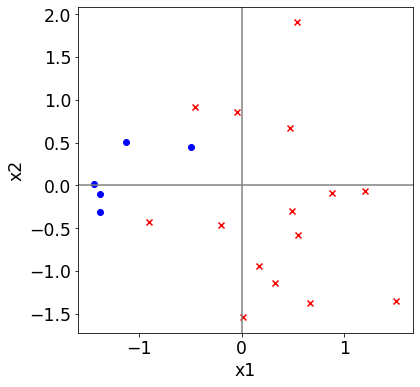

In [2]:
data = data_perceptron_noisy.gen()

myfig = plt.figure(figsize=(6,6))

idx_one = data.y_tr[:,0] == 1
idx_zero = data.y_tr[:,0] == 0

ax = myfig.add_subplot(1,1,1)
plt.axhline(y=0.0, color="grey")
plt.axvline(x=0.0, color="grey")
ax.scatter(data.X_tr[idx_one,1], data.X_tr[idx_one,2],
        marker="o", color="blue")
ax.scatter(data.X_tr[idx_zero,1], data.X_tr[idx_zero,2],
        marker="x", color="red")
plt.xlabel("x1", size=_fontsize)
plt.ylabel("x2", size=_fontsize)
ax.tick_params(labelsize=_fontsize)

plt.show()

In [3]:
_t_max = 5000
_reg_coef = 1e-6

In [4]:
w_init = np.zeros(shape=(data.d_tr,1), dtype=np.float32)

In [5]:
step = lambda t, model, data, newdir : 1/(_reg_coef*math.sqrt(t+1))
algo = algo_GD.SGD_ERM(w_init=w_init, step=step,
                       batchsize=1, replace=True,
                       reg_coef=_reg_coef, t_max=_t_max)

model = model_convpot.Hinge()

for onestep in algo:
    algo.update(model=model, data=data)
    norm_control = min(1, 1/(math.sqrt(_reg_coef)*(np.linalg.norm(algo.w)+1e-12)))
    algo.w *= norm_control
    

print("Final algorithm output:")
print(algo.w)

yhat_tr = model(X=data.X_tr, w=algo.w)
fail_check = (yhat_tr != data.y_tr).flatten()
fail_count = np.sum(fail_check)
print("Number bad = {} of {}.".format(fail_count,data.n_tr))

Final algorithm output:
[[-746.0275 ]
 [-406.96707]
 [-527.087  ]]
Number bad = 6 of 20.


In [6]:
def classifier_2D_helper(x1,x2):
    x = np.array([1.0, x1, x2]).reshape((1,3))
    return model(X=x, w=algo.w) # depends on current algo.w!

classifier_2D = np.vectorize(classifier_2D_helper)

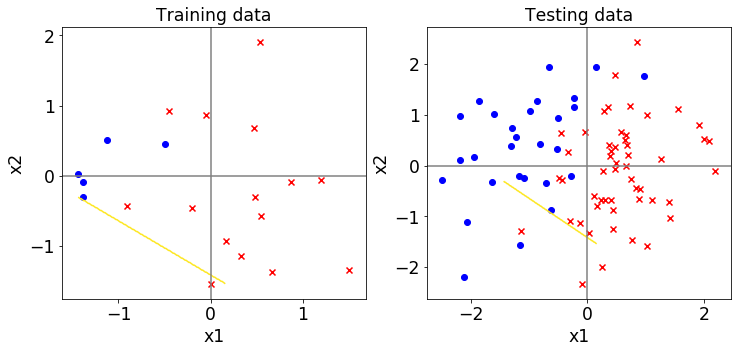

In [7]:
myfig = plt.figure(figsize=(12,5))

x1_upper = np.max(data.X_tr[:,1])
x1_lower = np.min(data.X_tr[:,1])
x2_upper = np.max(data.X_tr[:,2])
x2_lower = np.min(data.X_tr[:,2])
grid_granularity = 0.01
xx1, xx2 = np.meshgrid(np.arange(x1_lower,x1_upper,grid_granularity),
                       np.arange(x2_lower,x2_upper,grid_granularity))

zz = classifier_2D(x1=xx1, x2=xx2)

ax1 = myfig.add_subplot(1,2,1)
plt.title("Training data", size=_fontsize)
ax1.contour(xx1, xx2, zz, levels=[-0.5, 0.5])
plt.axhline(y=0.0, color="grey")
plt.axvline(x=0.0, color="grey")
idx_one = data.y_tr[:,0] == 1
idx_zero = data.y_tr[:,0] == 0
ax1.scatter(data.X_tr[idx_one,1], data.X_tr[idx_one,2],
        marker="o", color="blue")
ax1.scatter(data.X_tr[idx_zero,1], data.X_tr[idx_zero,2],
        marker="x", color="red")
plt.xlabel("x1", size=_fontsize)
plt.ylabel("x2", size=_fontsize)
ax1.tick_params(labelsize=_fontsize)

ax2 = myfig.add_subplot(1,2,2)
plt.title("Testing data", size=_fontsize)
ax2.contour(xx1, xx2, zz, levels=[-0.5, 0.5])
plt.axhline(y=0.0, color="grey")
plt.axvline(x=0.0, color="grey")
idx_one = data.y_te[:,0] == 1
idx_zero = data.y_te[:,0] == 0
ax2.scatter(data.X_te[idx_one,1], data.X_te[idx_one,2],
        marker="o", color="blue")
ax2.scatter(data.X_te[idx_zero,1], data.X_te[idx_zero,2],
        marker="x", color="red")
plt.xlabel("x1", size=_fontsize)
plt.ylabel("x2", size=_fontsize)
ax2.tick_params(labelsize=_fontsize)


plt.show()

___